In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

rows, cols = 20, 20
random_matrix = np.random.choice([0, 1], size=(rows, cols))

In [2]:
def find_neighbors(matrix, x, y):

    """Finding neighbors near the selected cell"""
    
    count = 0

    neighbors_matrix = [
        (-1,-1), (-1,0), (-1,1),
        (0,-1),          (0,1),
        (1,-1), (1,0), (1,1)
    ]

    for mx, my in neighbors_matrix:
        nx = x + mx
        ny = y + my

        if 0 <= nx < rows and 0 <= ny < cols:
            if matrix[nx,ny] == 1:
                count+=1

    return count


def check_fate(matrix):

    """Deciding cell fate by rules"""

    current_matrix = matrix.copy()

    for x in range(rows):
        for y in range(cols):
            count_neighbors = find_neighbors(current_matrix, x, y)

            if current_matrix[x,y] == 1:
                if count_neighbors <= 1:
                    current_matrix[x,y] = 0

                if  count_neighbors >= 4:
                    current_matrix[x,y] = 0

            elif current_matrix[x,y] == 0:
                if  count_neighbors == 3:
                    current_matrix[x,y] = 1

    return current_matrix

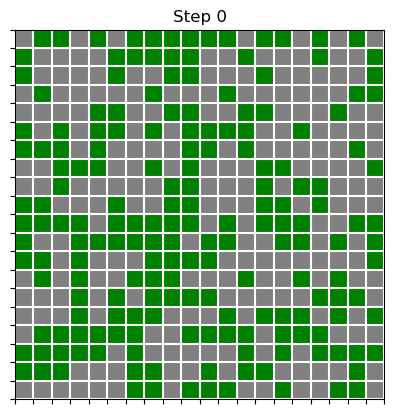

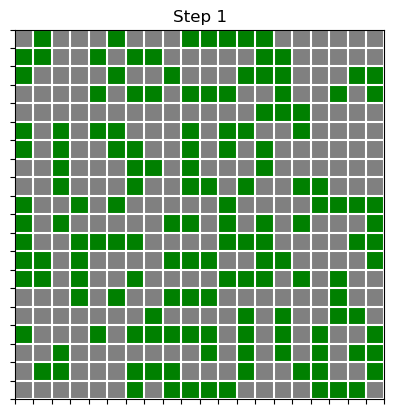

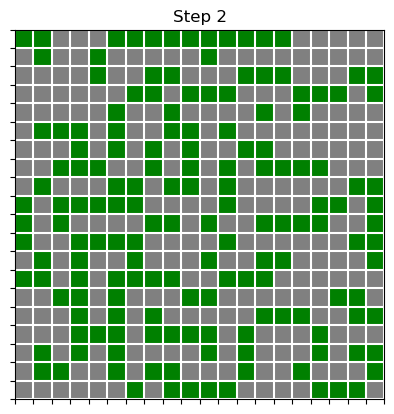

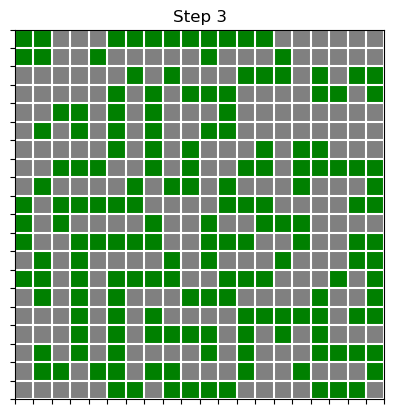

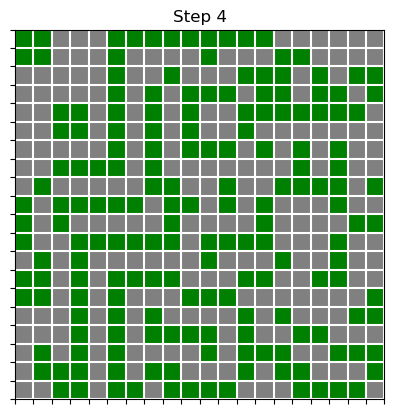

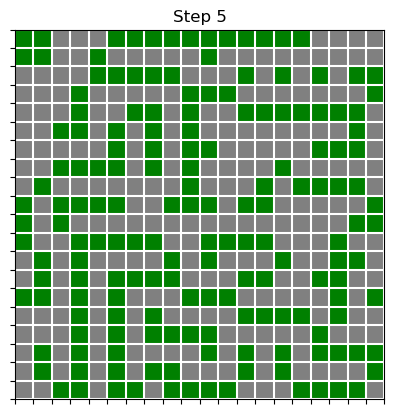

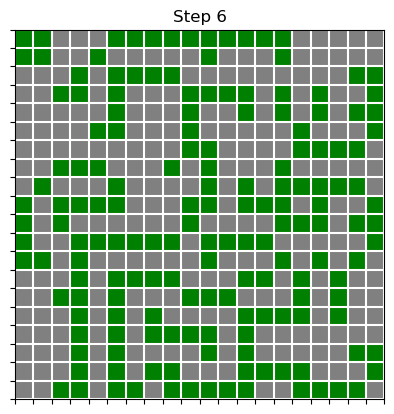

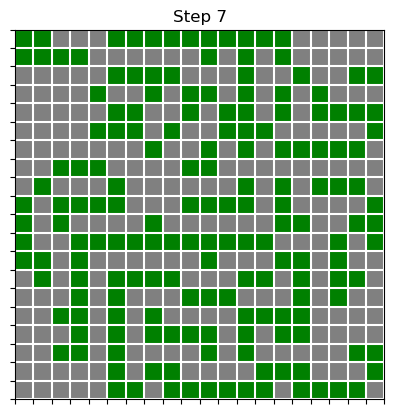

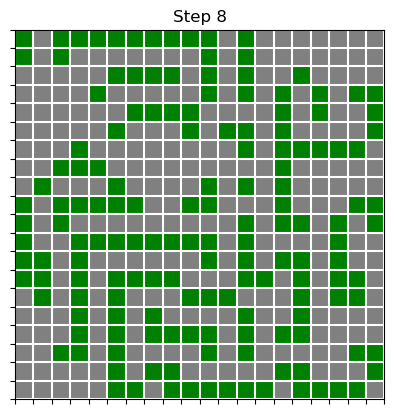

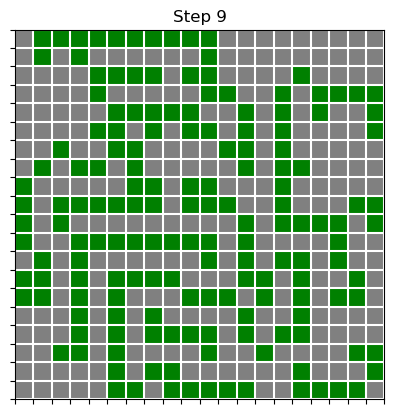

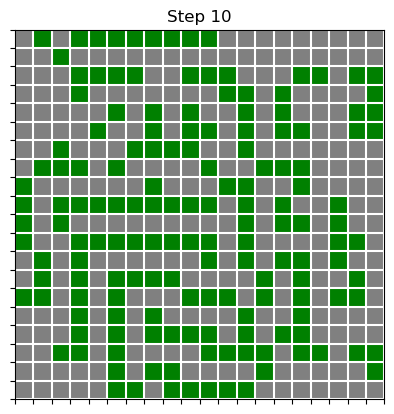

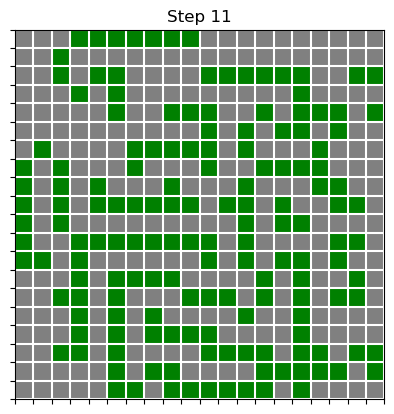

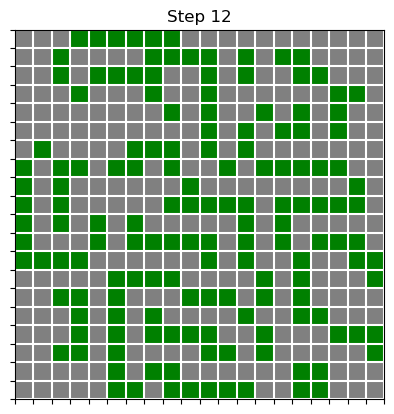

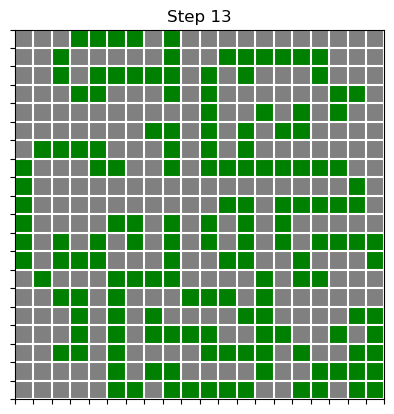

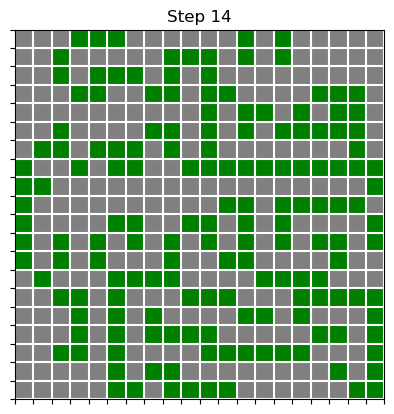

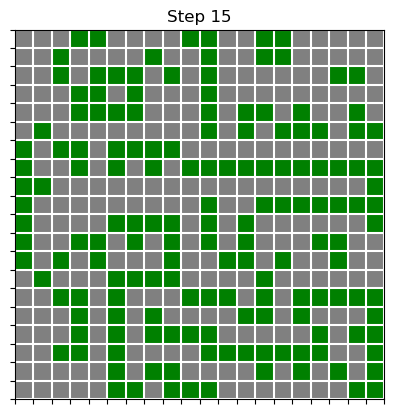

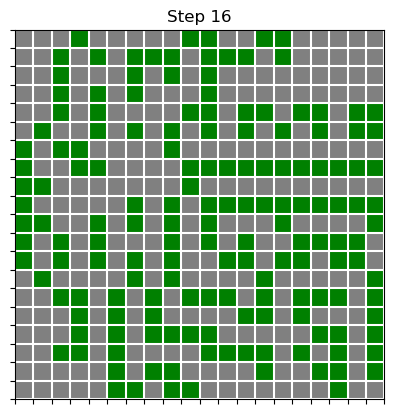

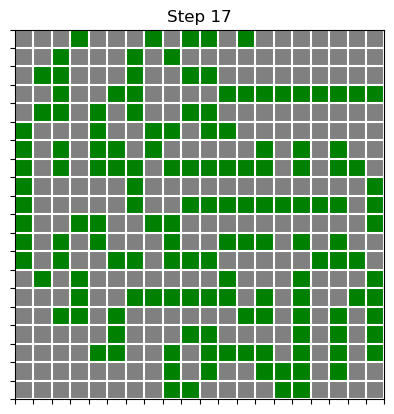

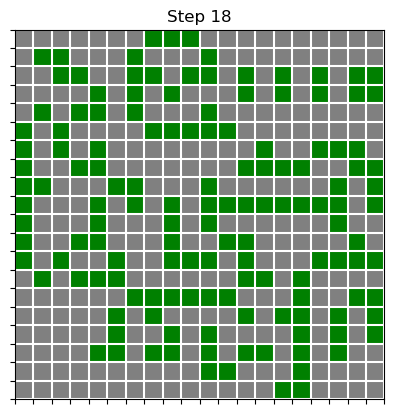

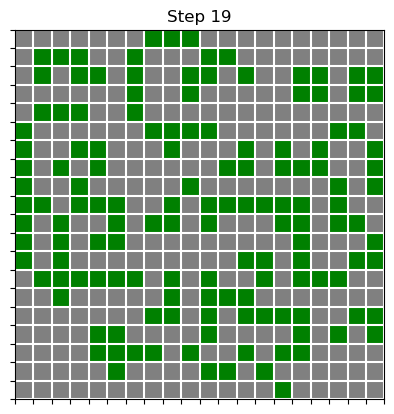

In [3]:
def show_steps(matrix, step):

    """Visualization of the execution process"""
    
    i = 0

    for i in range(step):
        cmap = ListedColormap(["gray", "green"])
        plt.clf()
        plt.title(f"Step {i}")
        plt.imshow(matrix, cmap=cmap)
        plt.grid(visible=True, color='white', linewidth=1.5)
        plt.xticks(np.arange(-0.5, 20, 1), [])
        plt.yticks(np.arange(-0.5, 20, 1), [])
        plt.pause(0.3)
        
        matrix = check_fate(matrix)

show_steps(random_matrix, 20)
plt.show()